In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express  as px

In [7]:
df = pd.read_csv(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\df_p6.csv")

In [8]:
df=df.set_index('date')
df

,todays_gen_prgm,todays_gen_act
date,,
01-09-2017,3463.59,3119.25
02-09-2017,3463.59,3151.28
03-09-2017,3463.45,3098.85
04-09-2017,3463.45,3307.26
05-09-2017,3476.53,3342.52
...,...,...
07-11-2024,4206.74,4095.64
08-11-2024,4202.64,4124.04
09-11-2024,4202.64,4122.92


In [19]:
import plotly.graph_objects as go

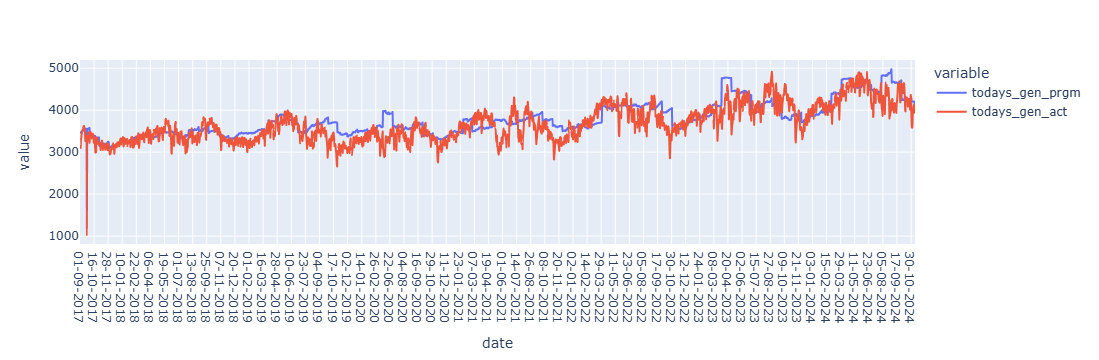

In [25]:
px.line(df, x=df.index, y=['todays_gen_prgm', 'todays_gen_act'])

In [28]:
df1=df.drop('todays_gen_prgm',axis=1)

<Axes: xlabel='date'>

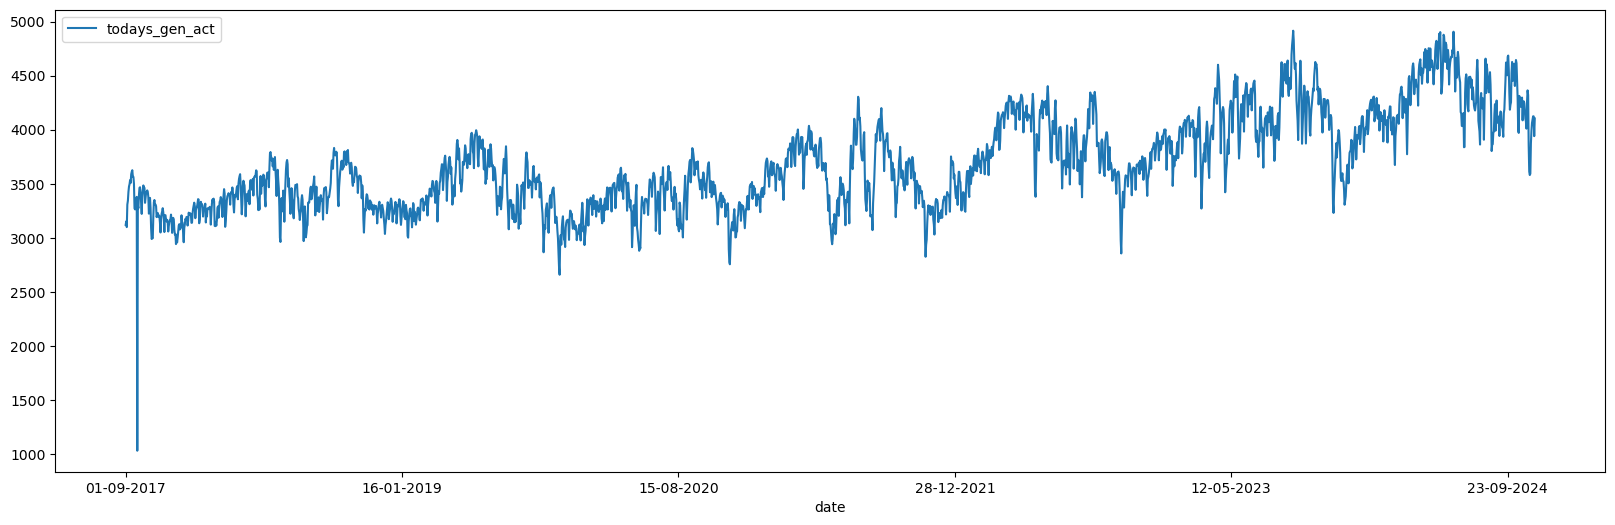

In [32]:
df1.plot(figsize=(20,6))

In [33]:
energy_req = pd.read_csv(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\energy-requirement-and-availabililty.csv")

In [35]:
energy_req

,month,state_name,state_code,energy_requirement,energy_availability
0,2020-01-01,Chandigarh,4.0,137.98,137.98
1,2020-01-01,Lakshadweep,31.0,3.85,3.85
2,2020-01-01,Bihar,10.0,2450.28,2447.67
3,2020-01-01,Jharkhand,20.0,783.94,777.72
4,2020-01-01,Odisha,21.0,2042.32,2042.32
...,...,...,...,...,...
1486,2023-06-01,Nagaland,13.0,80.92,80.92
1487,2023-06-01,Tripura,16.0,134.14,134.14
1488,2023-06-01,Madhya Pradesh,23.0,7442.59,7442.59
1489,2023-06-01,West Bengal,19.0,6380.89,6366.76


In [53]:
energy_req['net deficit']=energy_req['energy_requirement']-energy_req['energy_availability']

In [54]:
energy_req.head(2)

,month,state_name,state_code,energy_requirement,energy_availability,net deficit
0,2020-01-01,Chandigarh,4.0,137.98,137.98,0.0
1,2020-01-01,Lakshadweep,31.0,3.85,3.85,0.0


In [56]:
df_e2=energy_req.groupby('state_name').agg(
    {
        'energy_requirement':'sum',
        'energy_availability':'sum',
        'net deficit':'sum'
    }
)

In [59]:
df_e2.head(2)

,energy_requirement,energy_availability,net deficit
state_name,,,
Andaman- Nicobar,1241.90,1202.80,39.10
Andhra Pradesh,253657.22,252606.75,1050.47


<Axes: ylabel='state_name'>

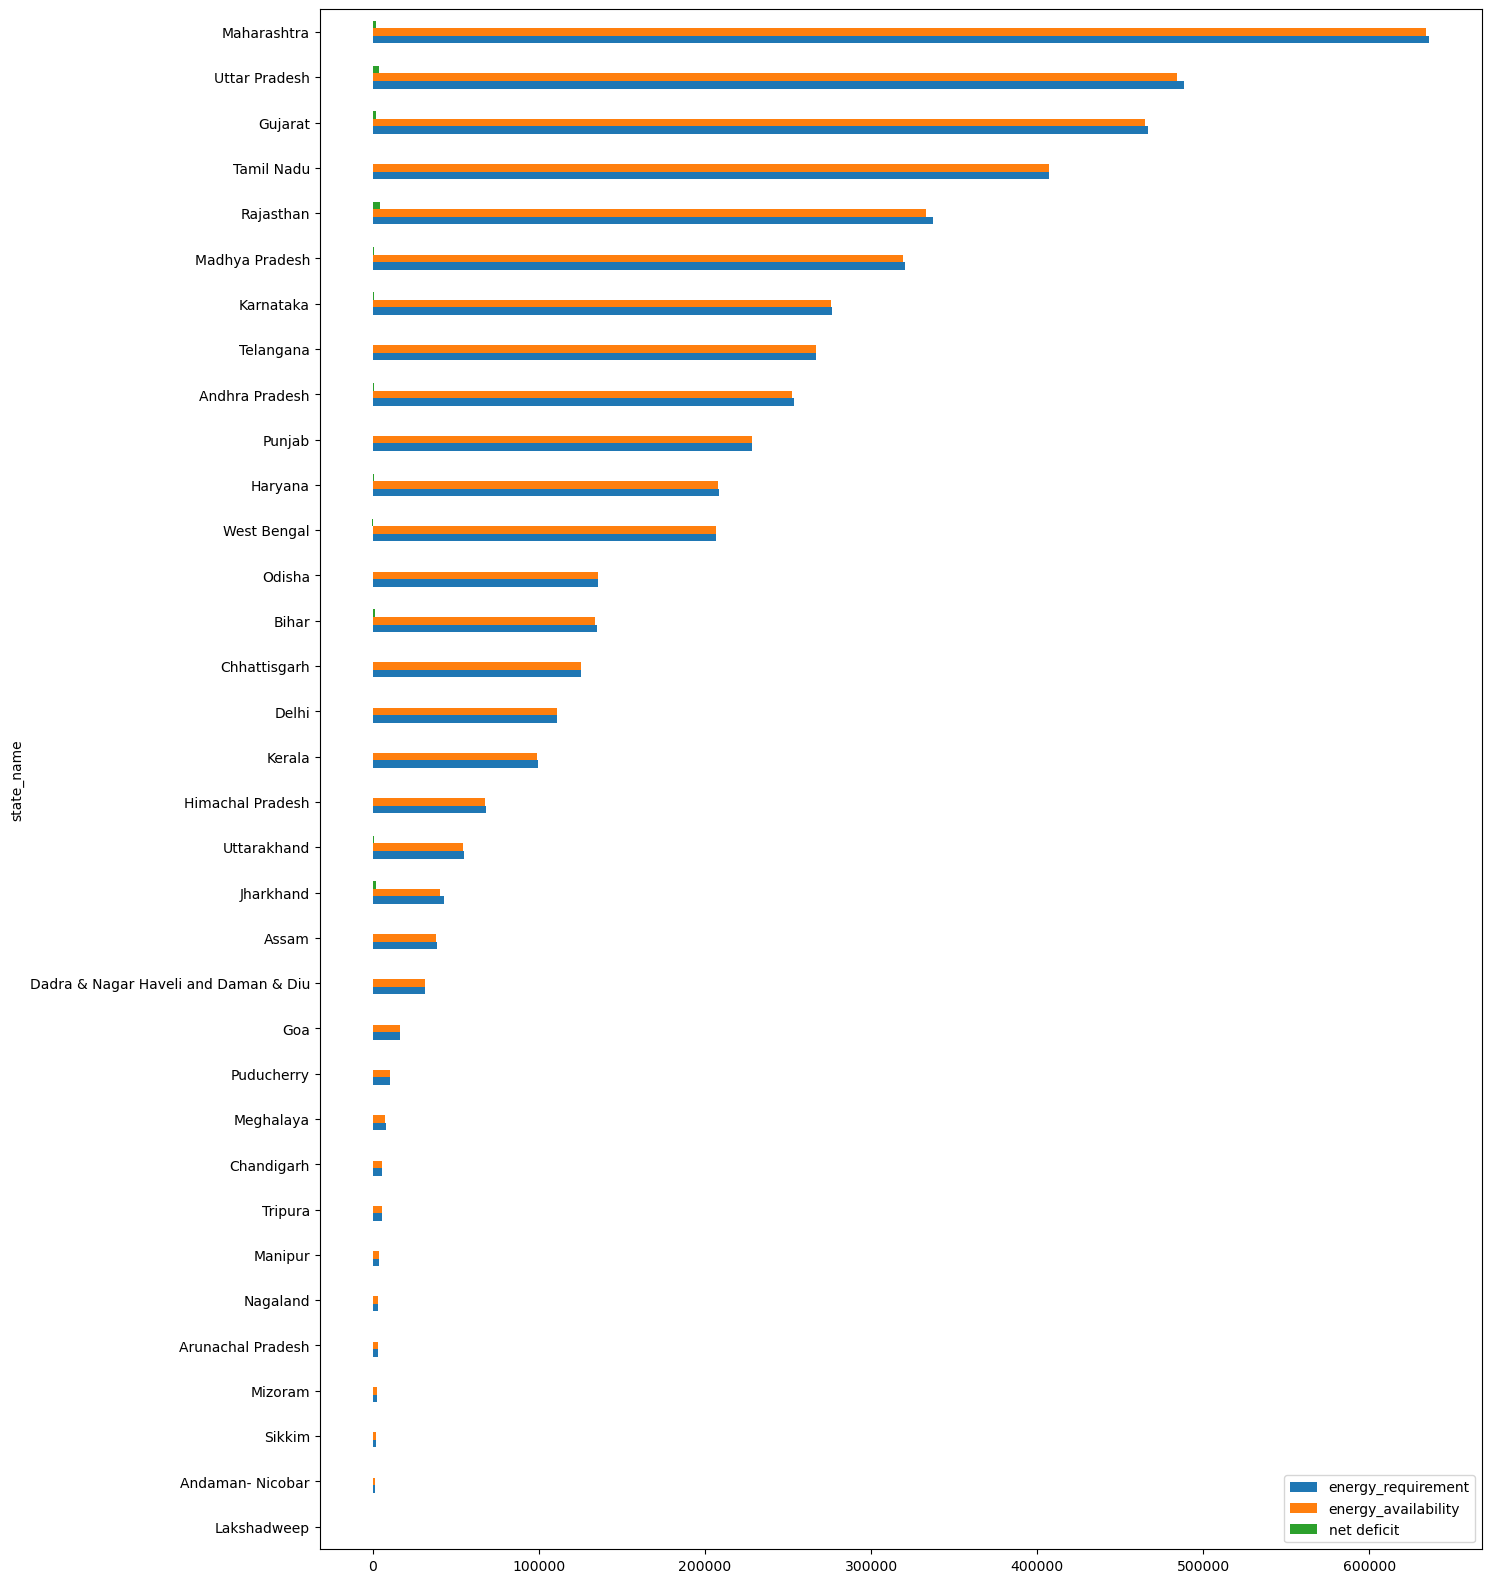

In [72]:
df_e2.sort_values(by='energy_requirement').plot.barh(figsize=(15,20))

Text(0.5, 1.0, 'net deficit of states')

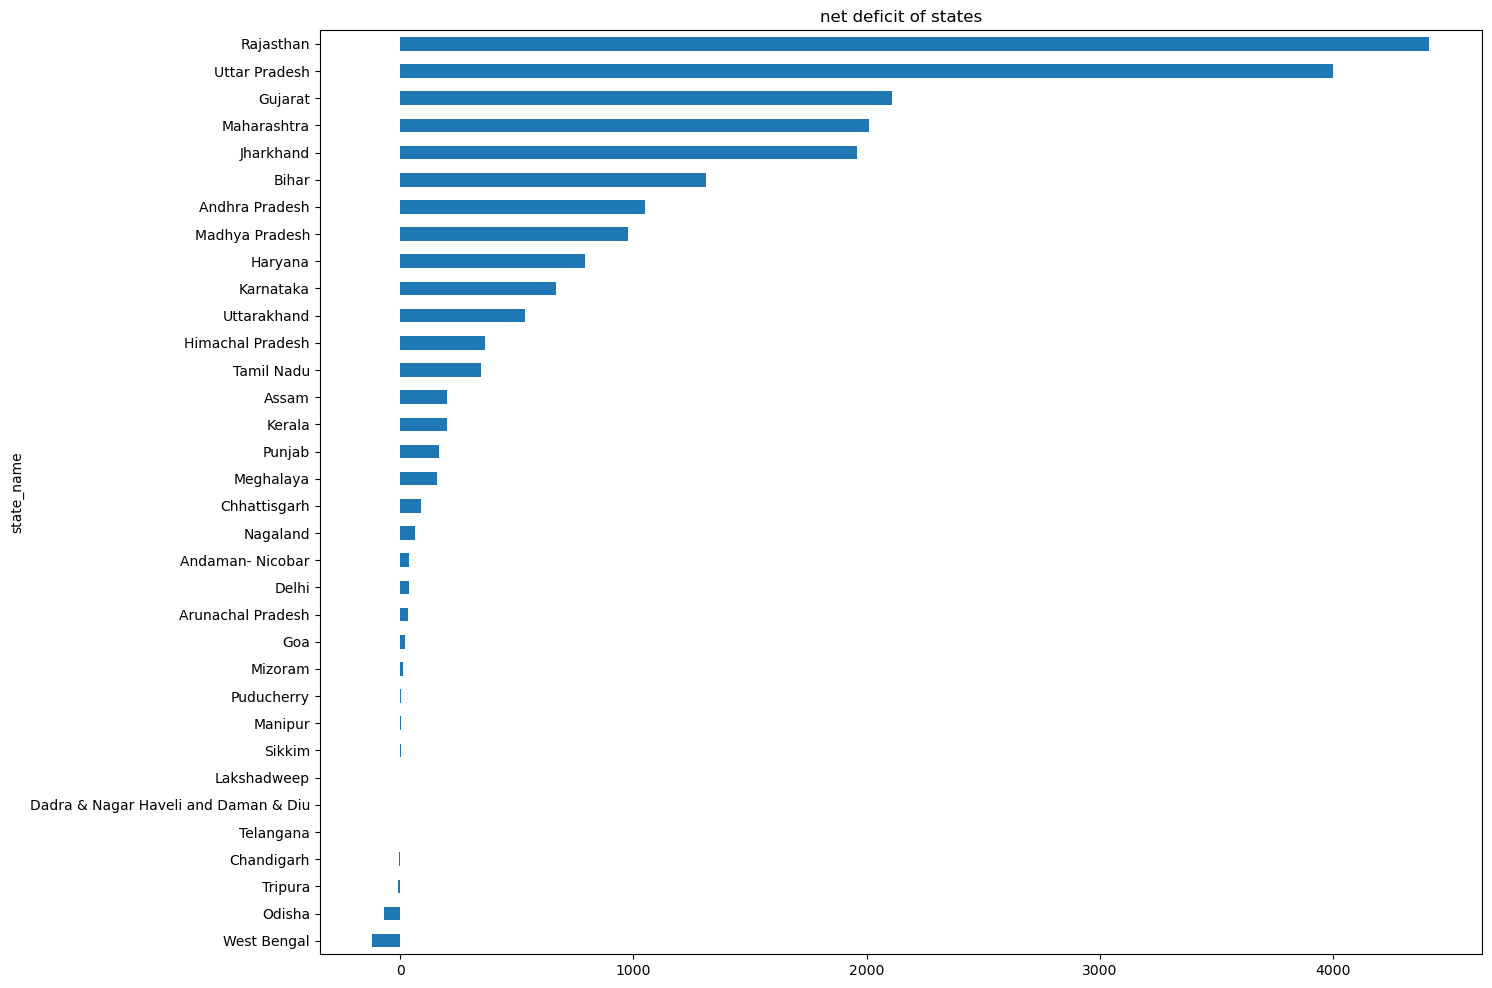

In [81]:
df_e2['net deficit'].sort_values().plot.barh(figsize=(15,12))
plt.title('net deficit of states')

In [39]:
df_e=energy_req.groupby('month').agg(
    {
        'energy_requirement':'sum',
        'energy_availability':'sum'
    }
)
df_e.head()

,energy_requirement,energy_availability
month,,
2020-01-01,101713.56,101555.91
2020-02-01,100502.71,100322.57
2020-03-01,96124.35,95998.31
2020-04-01,82639.08,82453.09
2020-05-01,99640.61,99388.04


In [42]:
df_e['net deficit']=df_e['energy_requirement']-df_e['energy_availability']

In [45]:
df_e.head()

,energy_requirement,energy_availability,net deficit
month,,,
2020-01-01,101713.56,101555.91,157.65
2020-02-01,100502.71,100322.57,180.14
2020-03-01,96124.35,95998.31,126.04
2020-04-01,82639.08,82453.09,185.99
2020-05-01,99640.61,99388.04,252.57


Text(0.5, 1.0, 'availability & requirement')

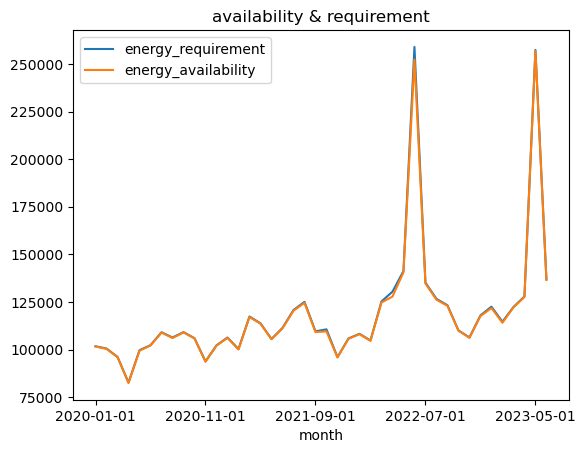

In [52]:
df_e[['energy_requirement','energy_availability']].plot()
plt.title('availability & requirement')

Text(0.5, 1.0, 'net deficit')

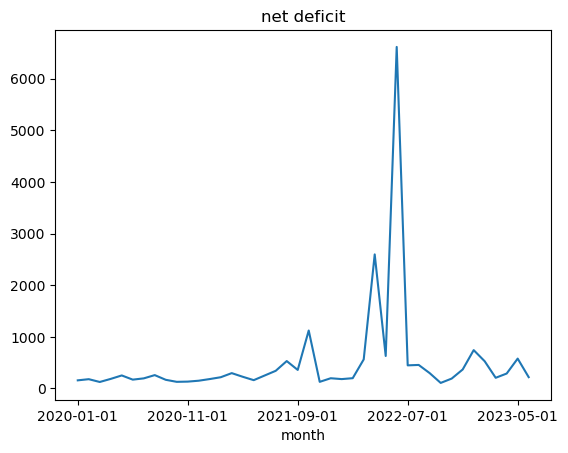

In [51]:
df_e['net deficit'].plot()
plt.title('net deficit')

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
df1

,todays_gen_act
date,
01-09-2017,3119.25
02-09-2017,3151.28
03-09-2017,3098.85
04-09-2017,3307.26
05-09-2017,3342.52
...,...
07-11-2024,4095.64
08-11-2024,4124.04
09-11-2024,4122.92


In [89]:
result = seasonal_decompose(df1['todays_gen_act'], model='additive', period=30)

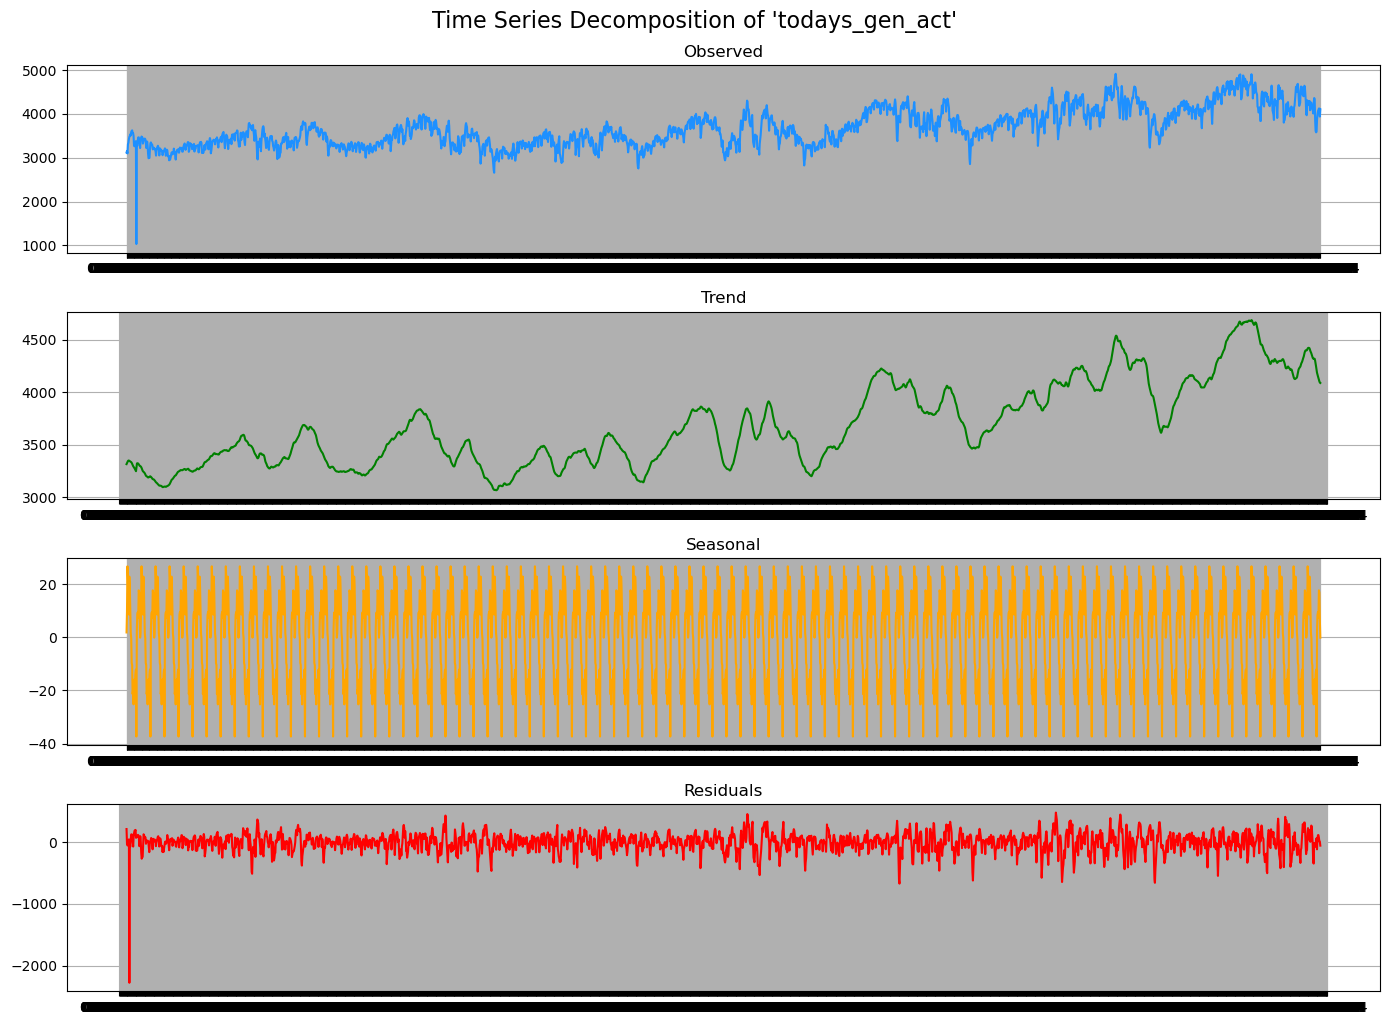

In [90]:
trend = result.trend
seasonal = result.seasonal
resid = result.resid
observed = result.observed
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(observed, label='Observed', color='dodgerblue')
plt.title('Observed')
plt.grid(True)

plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend')
plt.grid(True)

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='orange')
plt.title('Seasonal')
plt.grid(True)

plt.subplot(414)
plt.plot(resid, label='Residuals', color='red')
plt.title('Residuals')
plt.grid(True)

plt.tight_layout()
plt.suptitle("Time Series Decomposition of 'todays_gen_act'", fontsize=16, y=1.02)
plt.show()

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [95]:
model = ExponentialSmoothing(
    df1['todays_gen_act'], 
    trend='add',          
    seasonal='add',        
    seasonal_periods=30    
)

C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [104]:
fit = model.fit()
forecast = fit.forecast(720)

C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



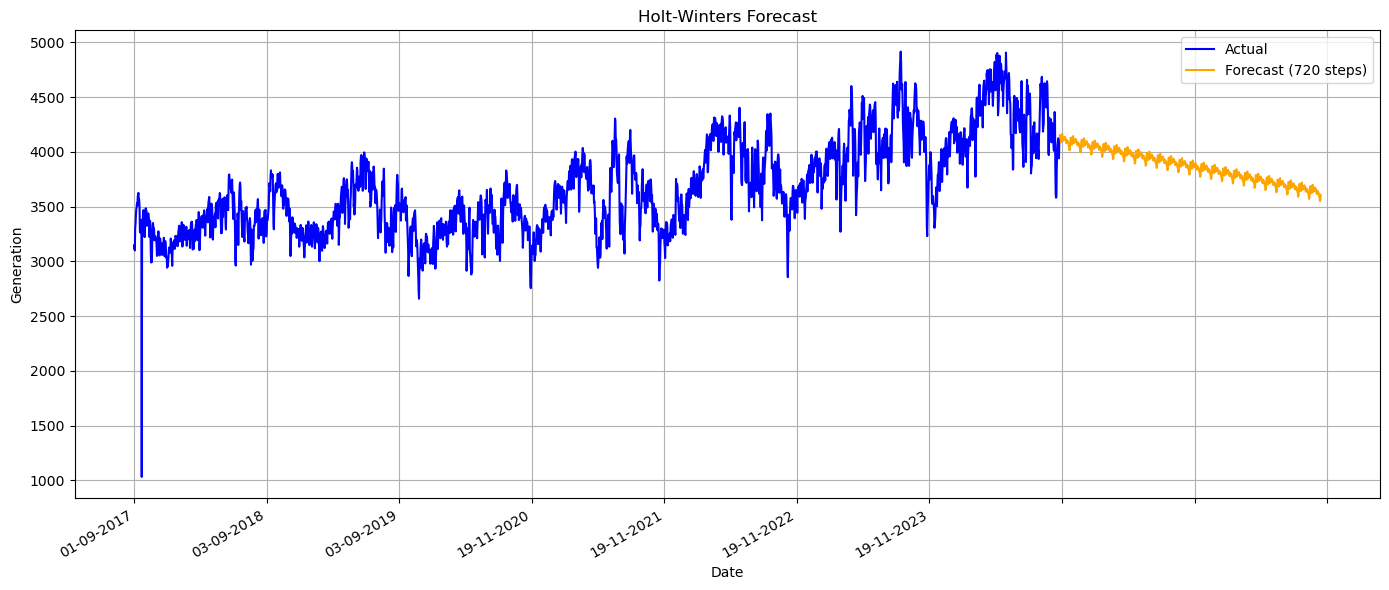

In [105]:
plt.figure(figsize=(14, 6))
plt.plot(df1['todays_gen_act'], label='Actual', color='blue')
plt.plot(forecast, label='Forecast (720 steps)', color='orange')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Generation')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
from prophet import Prophet

In [3]:
df1 = pd.read_csv(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\time_series_energy.csv")

In [4]:
df_prophet = df1.copy()

In [5]:
df_prophet.columns = ['ds', 'y']

In [6]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%d-%m-%Y', errors='coerce')

In [7]:
df_prophet.dropna(subset=['ds', 'y'], inplace=True)

In [8]:
print(df_prophet.dtypes)
print(df_prophet.head())
print(f"✅ Cleaned rows: {len(df_prophet)}")

ds    datetime64[ns]
y            float64
dtype: object
          ds        y
0 2017-09-01  3119.25
1 2017-09-02  3151.28
2 2017-09-03  3098.85
3 2017-09-04  3307.26
4 2017-09-05  3342.52
✅ Cleaned rows: 2550


In [10]:
df_prophet.to_csv('df_prophet.csv')